In [3]:
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store

from tqdm import tqdm
import xarray as xr
import numpy as np
import os

store = new_data_store("s3", root="deep-esdl-output")

In [4]:
list(store.get_data_ids())

['black-sea-1x1024x1024.levels',
 'black-sea-1x1024x1024.zarr',
 'black-sea-256x128x128.zarr',
 'esdc-8d-0.25deg-1x720x1440-3.0.0.zarr',
 'esdc-8d-0.25deg-1x720x1440-3.0.1.zarr',
 'esdc-8d-0.25deg-1x720x512-3.0.0.zarr',
 'esdc-8d-0.25deg-256x128x128-3.0.0.zarr',
 'esdc-8d-0.25deg-256x128x128-3.0.1.zarr',
 'polar-100m-1x2048x2048-v1.0.0.zarr']

In [6]:
da = store.open_data('esdc-8d-0.25deg-256x128x128-3.0.1.zarr')
da

,Array,Chunk
Bytes,7.64 GiB,16.00 MiB
Shape,"(1978, 720, 1440)","(256, 128, 128)"
Count,2 Graph Layers,576 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,7.64 GiB,16.00 MiB
Shape,"(1978, 720, 1440)","(256, 128, 128)"
Count,2 Graph Layers,576 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [5]:
da = store.open_data('polar-100m-1x2048x2048-v1.0.0.zarr')
da

<xarray.Dataset>
Dimensions:                                 (y: 21210, x: 19530, time: 2)
Coordinates:
  * time                                    (time) datetime64[ns] 2013-01-01 ...
  * x                                       (x) float64 -2.602e+06 ... -6.496...
  * y                                       (y) float64 -1.626e+06 ... 4.95e+05
Data variables:
    curie_depth_200km                       (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    curie_depth_300km                       (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    geothermal_heat_flow_200km              (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    geothermal_heat_flow_300km              (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    geothermal_heat_flow_uncertainty_200km  (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    geothermal_heat_flow_uncertainty_300km  (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    ice_thickness                           (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    magnetic_anomaly                        (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    thw_124                                 (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    thw_142                                 (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    thw_170                                 (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    thw_70                                  (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>

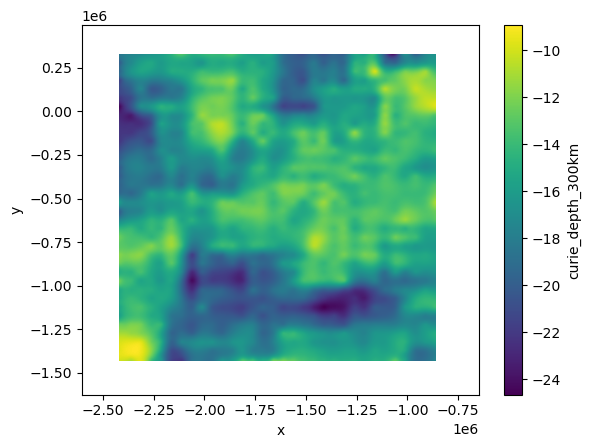

In [84]:
da.curie_depth_300km.plot.imshow()

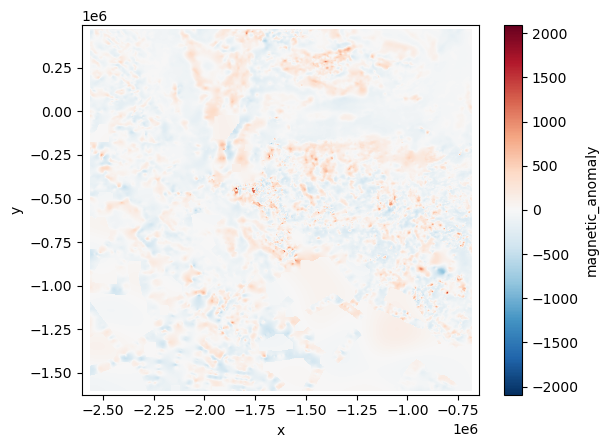

In [81]:
da.magnetic_anomaly.plot.imshow()